# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [82]:
import numpy as np
from scipy.optimize import differential_evolution
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

             message: Optimization terminated successfully.
             success: True
                 fun: 4.440892098500626e-16
                   x: [ 0.000e+00  0.000e+00]
                 nit: 96
                nfev: 2973
          population: [[ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]
                       ...
                       [ 0.000e+00  0.000e+00]
                       [ 0.000e+00  0.000e+00]]
 population_energies: [ 4.441e-16  4.441e-16 ...  4.441e-16  4.441e-16]

In [32]:
help(differential_evolution)

Help on function differential_evolution in module scipy.optimize._differentialevolution:

differential_evolution(func, bounds, args=(), strategy='best1bin', maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None, *, integrality=None, vectorized=False)
    Finds the global minimum of a multivariate function.
    
    The differential evolution method [1]_ is stochastic in nature. It does
    not use gradient methods to find the minimum, and can search large areas
    of candidate space, but often requires larger numbers of function
    evaluations than conventional gradient-based techniques.
    
    The algorithm is due to Storn and Price [2]_.
    
    Parameters
    ----------
    func : callable
        The objective function to be minimized. Must be in the form
        ``f(x, *args)``, where ``x`` is the argument in the form o

In [91]:
### YOUR CODE HERE
strategies = ['best1bin', 'best1exp', 'rand1bin', 'rand1exp','best2exp','best2bin']
pop_sizes = [_value for _value in range(0,51,5)]
mutation_list = [round(_value * 0.2,1) for _value in range(0,10)]
mutation_list_cort = [(mutation_list[i],mutation_list[-i])
                        for i in range(1,len(mutation_list)) if mutation_list[i] < mutation_list[-i]]
mutations = mutation_list + mutation_list_cort
print(f'{pop_sizes=}\n{strategies=}\n{mutation_list=}\n{mutation_list_cort=}\n{mutations=}')

def experiment():
    results_new = {'strategy':[],'popsize':[],'mutation':[],'nit':[]}
    for strategy in strategies:
        for popsize in pop_sizes:
            for mutation in mutations:
                res = differential_evolution(ackley, bounds, strategy=strategy, popsize=popsize, mutation=mutation, seed=42)
                results_new['strategy'].append(strategy)
                results_new['popsize'].append(popsize)
                results_new['mutation'].append(mutation)
                results_new['nit'].append(res.nit)
    return results_new
    
results = experiment()



pop_sizes=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
strategies=['best1bin', 'best1exp', 'rand1bin', 'rand1exp', 'best2exp', 'best2bin']
mutation_list=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
mutation_list_cort=[(0.2, 1.8), (0.4, 1.6), (0.6, 1.4), (0.8, 1.2)]
mutations=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, (0.2, 1.8), (0.4, 1.6), (0.6, 1.4), (0.8, 1.2)]


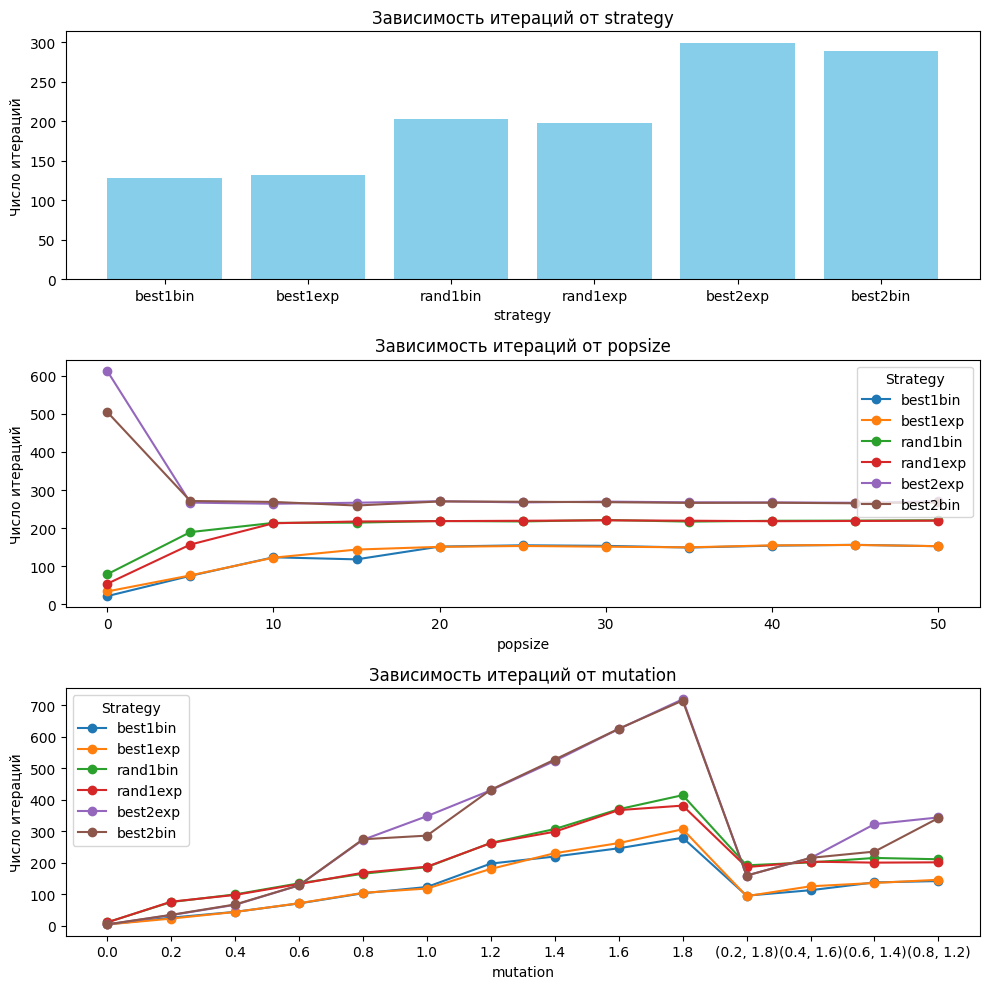

<Figure size 640x480 with 0 Axes>

In [108]:
fig, axes = plt.subplots(3, figsize=(10, 10))

ax = axes[0]
strategy_nit = [np.mean([results['nit'][i] for i in range(len(results['strategy'])) if results['strategy'][i] == s]) for s in strategies]
ax.bar(strategies, strategy_nit, color='skyblue')
ax.set_title('Зависимость итераций от strategy')
ax.set_ylabel('Число итераций')
ax.set_xlabel('strategy')

# График зависимости от popsize с указанием стратегий
ax = axes[1]
for strategy in strategies:
    popsize_nit = [np.mean([results['nit'][i] for i in range(len(results['popsize']))
                            if results['popsize'][i] == p and results['strategy'][i] == strategy])
                   for p in pop_sizes]
    ax.plot(pop_sizes, popsize_nit, marker='o', linestyle='-', label=strategy)  # Добавляем label стратегии
ax.set_title('Зависимость итераций от popsize')
ax.set_ylabel('Число итераций')
ax.set_xlabel('popsize')
ax.legend(title='Strategy')

# График зависимости от mutation с указанием стратегий
ax = axes[2]
mutation_labels = [str(m) for m in mutations]
for strategy in strategies:
    mutation_nit = [np.mean([results['nit'][i] for i in range(len(results['mutation']))
                             if results['mutation'][i] == m and results['strategy'][i] == strategy])
                    for m in mutations]
    ax.plot(mutation_labels, mutation_nit, marker='o', linestyle='-', label=strategy)
ax.set_title('Зависимость итераций от mutation')
ax.set_ylabel('Число итераций')
ax.set_xlabel('mutation')
ax.legend(title='Strategy')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [109]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [ ]:
### YOUR CODE HERE

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
